# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. 

In [2]:
# Your code here:
salaries = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [4]:
cols=[]
for c in salaries.columns:
    cols.append(c.lower())
salaries.columns=cols
salaries.columns = salaries.columns.str.replace(' ', '_')

salaries.head()

,name,job_titles,department,full_or_part-time,salary_or_hourly,typical_hours,annual_salary,hourly_rate
0,"ADRIANO, RACQUEL ANNE",PARAMEDIC,FIRE,F,Salary,NaN,72510.0,NaN
1,"AFFANEH, MAHIR A",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
2,"AFOENYI, PHYLLIS",TITLE V PROGRAM TRAINEE I,FAMILY & SUPPORT,P,Hourly,20.0,NaN,13.0
3,"AGAR, BULENT B",DEPUTY COMMISSIONER,WATER MGMNT,F,Salary,NaN,132972.0,NaN
4,"AGEE, LAWRENCE",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
# Your code here:
salaries.isna().sum()
salaries.isna().sum()/len(salaries)

name                 0.000000
job_titles           0.000000
department           0.000000
full_or_part-time    0.000000
salary_or_hourly     0.000000
typical_hours        0.757462
annual_salary        0.242538
hourly_rate          0.757462
dtype: float64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
# Your code here:
salaries['salary_or_hourly'].value_counts()

Salary    25528
Hourly     8174
Name: salary_or_hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
# Your code here:
salaries.pivot_table(index= ['department'], values = ['name'], aggfunc = pd.Series.nunique)
# data.groupby('Department').agg({'Name':pd.Series.nunique})

,name
department,
ADMIN HEARNG,38
ANIMAL CONTRL,75
AVIATION,1855
BOARD OF ELECTION,111
BOARD OF ETHICS,8
BUDGET & MGMT,44
BUILDINGS,258
BUSINESS AFFAIRS,167
CITY CLERK,88


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
data_num = salaries.select_dtypes(np.number)
data_num

,typical_hours,annual_salary,hourly_rate
0,NaN,72510.0,NaN
1,NaN,93354.0,NaN
2,20.0,NaN,13.0
3,NaN,132972.0,NaN
4,NaN,90024.0,NaN
...,...,...,...
33697,NaN,72510.0,NaN
33698,NaN,76266.0,NaN
33699,NaN,90024.0,NaN
33700,NaN,93354.0,NaN


In [9]:
# Your code here:
import scipy.stats

data_num_hour = data_num['hourly_rate'].dropna()
data_num_hour.isna().sum()

confidence_level = 0.95
degrees_freedom = len(data_num_hour) - 1
sample_mean = np.mean(data_num_hour)
sample_standard_error = scipy.stats.sem(data_num_hour)
confidence_interval = scipy.stats.t.interval(confidence_level,
                                             degrees_freedom,
                                             sample_mean,
                                             sample_standard_error)


In [10]:
print( 'confidence interval is ', confidence_interval, '.' ) 

confidence interval is  (34.29839539204361, 34.874504045197305) .


In [11]:
import scipy.stats 
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(data_num_hour,30)

In [12]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   31.211500329216044
pvalue for the two-tailed test is  3.825475847673794e-202
pvalue for the one-tailed test is  1.912737923836897e-202


In [13]:
#In both tests that we conducted we can see that the two-tailed test is significantly lower than the p-value, meaning that the hourly wage is closer to 30$/hour. 

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [14]:
# Your code here:
data_police = salaries[salaries['department']=='POLICE']
data_police_annual = data_police[['annual_salary']]
data_police_annual
data_police_annual = data_police_annual.dropna()
data_police_annual.mean()

annual_salary    88834.118924
dtype: float64

In [15]:
import scipy.stats

confidence_level = 0.95
degrees_freedom = len(data_police_annual) - 1
sample_mean = np.mean(data_police_annual)
sample_standard_error = scipy.stats.sem(data_police_annual)
confidence_interval = scipy.stats.t.interval(confidence_level,
                                             degrees_freedom,
                                             sample_mean,
                                             sample_standard_error)


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [16]:
print( 'confidence interval is ', confidence_interval, '.' ) 

confidence interval is  (array([88534.11828859]), array([89134.11955863])) .


In [17]:
import scipy.stats 
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(data_police_annual,86000)

In [18]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   [18.51748562]
pvalue for the two-tailed test is  [1.22391339e-75]
pvalue for the one-tailed test is  [6.11956695e-76]


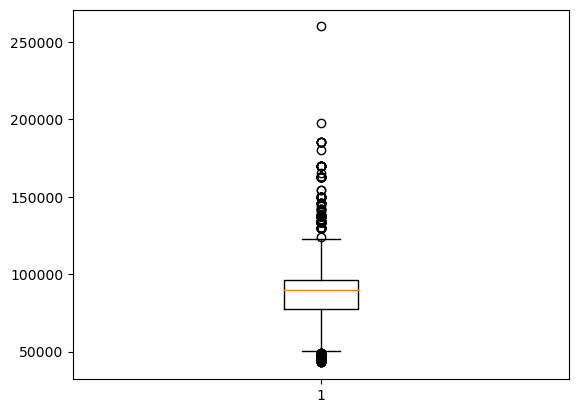

In [19]:
plt.boxplot(data_police_annual['annual_salary'])
plt.show()

In [20]:
# Based on the above values, our hypothesis is that the mean salary is higher than last year(as shown in the mean and confidence intervals.Unfortunately,the pvalue shows otherwise, and we base this discrepancy on the outliers. As shown in the above boxplot.  

Using the `crosstab` function, find the department that has the most hourly workers. 

In [21]:
data_crosstab = pd.crosstab(salaries['department'], salaries['hourly_rate'], margins=True) 

In [22]:
#Upon taking a look at the data, we can see that 'Streets & San' have the most number of hourly workers.

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [25]:
# Creating a separate df just for the 'Streets & San' workers on the hourly rate
st_san_salary = salaries[salaries['department'] == 'STREETS & SAN']
st_san_salary = st_san_salary[['hourly_rate']]
st_san_salary
st_san_salary = st_san_salary.dropna()

In [26]:
import scipy.stats

confidence_level = 0.95
degrees_freedom = len(st_san_salary) - 1
sample_mean = np.mean(st_san_salary)
sample_standard_error = scipy.stats.sem(st_san_salary)
confidence_interval = scipy.stats.t.interval(confidence_level,
                                             degrees_freedom,
                                             sample_mean,
                                             sample_standard_error)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
print( 'confidence interval is ', confidence_interval, '.' ) 

confidence interval is  (array([35.28150812]), array([35.8230856])) .


In [28]:
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(st_san_salary,35)

In [29]:
#One-sided test:
#Null hypothesis or H0: Hourly_wage >=35$
#Alternative hypothesis or H1: Hourly_wage < 35$
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

print('pvalue for the one-tailed test is ', pval/2)

stat is   [4.0001388]
pvalue for the two-tailed test is  [6.58047444e-05]
pvalue for the one-tailed test is  [3.29023722e-05]


In [ ]:
#Its still lower than the hypothesized value, meaning that the employees are in fact getting paid more than $35/hourer

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [ ]:
# Your code here:



Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [ ]:
# Your code here:



# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [ ]:
# Your code here:

